In [1]:
import math
import copy 
import tqdm
import time
import torch
import gpytorch
import pickle 
import itertools 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict, OrderedDict

from math import comb
from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams
from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML
from IPython.display import clear_output

import os, sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['PRJ'] = "/Users/ymohit/sgkigp/"
sys.path.append(os.environ['PRJ'])

random.seed(1337)
np.random.seed(1337)

%matplotlib inline
%load_ext autoreload
%autoreload 2

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


/var/folders/gj/ns_zjdqx57b1mrqf3l8_rcd40000gp/T/ipykernel_7134/3898366358.py:16: DeprecationWarning: Please use `asmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import asmatrix


In [16]:
from sgkigp.interp.sparse.combination import spinterpolate_tch_interpolation



Kind: InterpType.LINEAR 	Boundary: SgBasisType.MODIFIED 




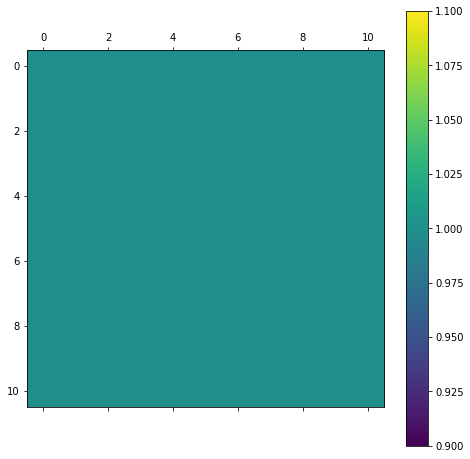

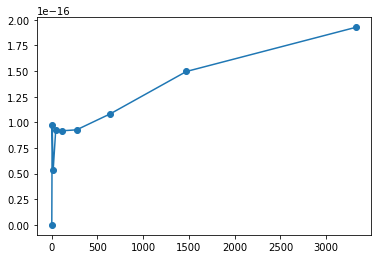

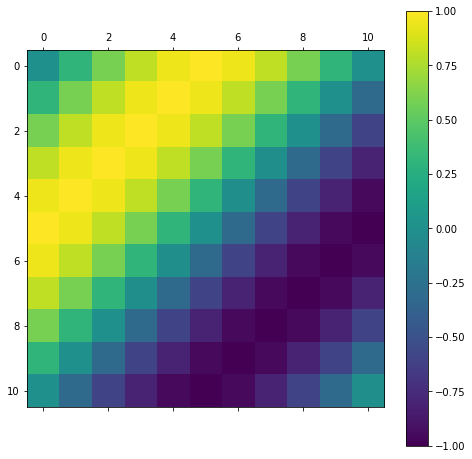

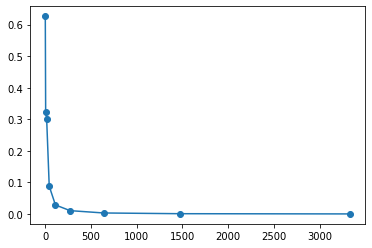



Kind: InterpType.CUBIC 	Boundary: SgBasisType.MODIFIED 




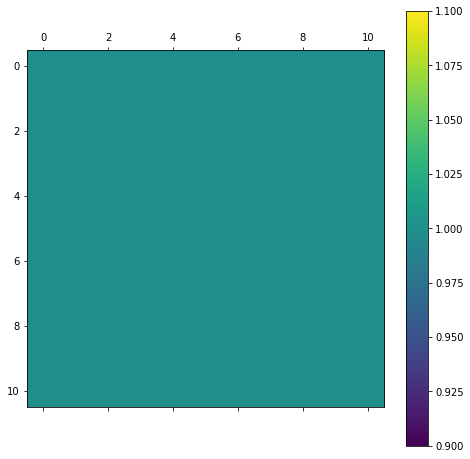

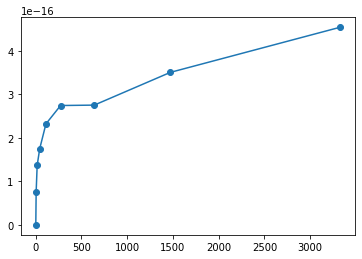

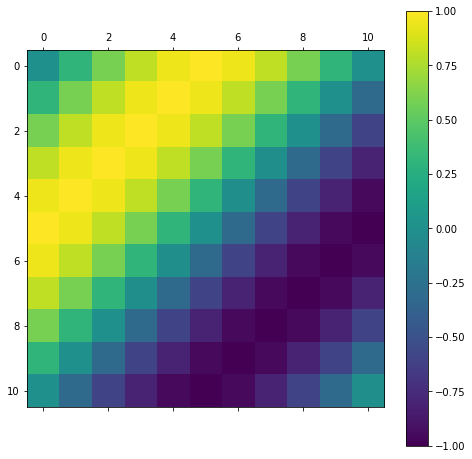

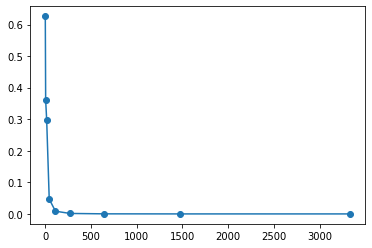



Kind: InterpType.SIMPLEX 	Boundary: SgBasisType.MODIFIED 




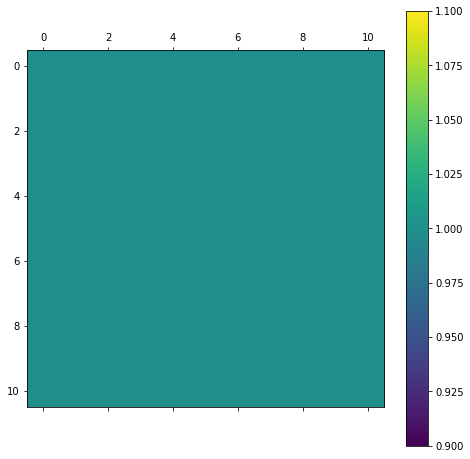

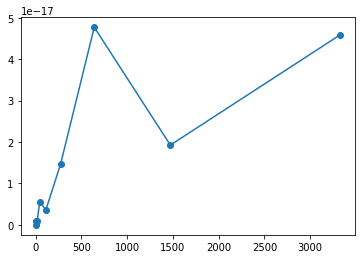

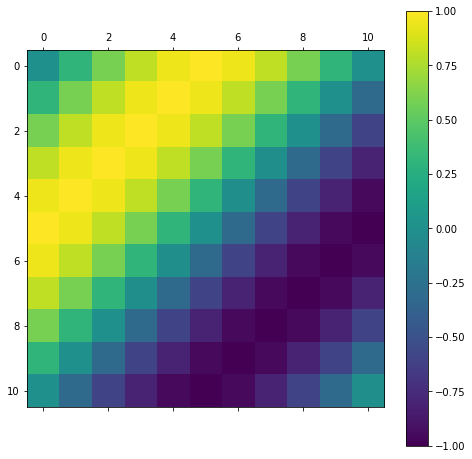

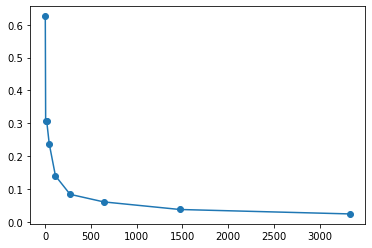

In [17]:

def run_experiment(func, kind_val=0, basis_val=0, epsilon=0.1):
    ## Testing interpolation for 2-D constant function

    umin = -epsilon
    umax = 1 + epsilon
    ndim = 2

    ndimpoints = 11
    epsilon = 10 ** (-7)
    x1s = np.linspace(0 + epsilon, 1 - epsilon, num=ndimpoints)
    x2s = np.linspace(0 + epsilon, 1 - epsilon, num=ndimpoints)
    x1, x2 = np.meshgrid(x1s, x2s)  # Generate grid
    X = np.vstack([x1.ravel(), x2.ravel()]).T
    npoints = X.shape[0]

    figsize = (8, 8)

    kind = InterpType(kind_val)
    basis = SgBasisType(basis_val)

    gl_rmse = []
    n_points = []
    for gl in range(0, 9):
        f_h, numpoints = spinterpolate_tch_interpolation(func, X, gl, ndim, umin, umax, kind=kind, basis=basis)
        n_points += numpoints,
        gl_rmse += np.mean(np.abs(func(X) - f_h)),

    fig, axs = plt.subplots(1, 1, figsize=figsize)
    aax = axs.matshow(func(X).reshape(ndimpoints, ndimpoints))
    fig.colorbar(aax, ax=axs)
    plt.show()
    plt.plot(n_points, gl_rmse, 'o-')
    plt.show()
    

for kind_val in [0, 1, 2]:
    for basis_val in [1]:        
        print("\n\nKind:", InterpType(kind_val), "\tBoundary:", SgBasisType(basis_val), "\n\n")       
        
        run_experiment(lambda x: 1 * np.ones(x.shape[0]), kind_val=kind_val, basis_val=basis_val)
        run_experiment(lambda x: np.sin(np.pi*(x[:, 0] + x[:, 1])),  kind_val=kind_val, basis_val=basis_val)